# Predicting Flight Prices Using Regression Machine Learning Model
This project involves studying flight booking dataset obtained from the *Easemytrip* website to conduct various analysis on the dataset to draw meaningful information from the data to determine factors which influence the change in price of various flights, as well building a machine learning model capable of predicting flight prices based on various factors surrounding fight bookings.

## Preparing the tools we need

In [1]:
# Importing the neccesary tools and libraries needed

# Data Manipulation and Exploratory Data Analysis (EDA)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Loading the Data
df = pd.read_csv("Data/Clean_Dataset.csv", low_memory=False)
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [208]:
df.isnull().sum()

# No null values

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [5]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


### a) Percentage of Total Flights for Each Airline
>Visatra had the most flights with approximately 43%  of the total flights by Vistara, while Air India had the second highest percentage with 27%. SpiceJet
had the lowest number of flights with it's percentage of the total flights being just 3.0%.

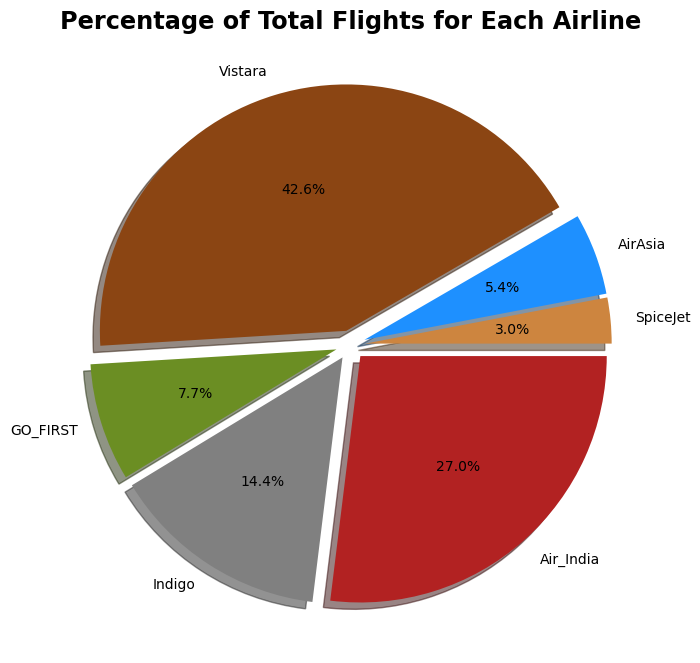

In [230]:
fig, ax = plt.subplots(figsize=(8,8))

ax.pie(df.airline.value_counts(normalize=True, sort=False), 
       labels= df.airline.unique(), 
       autopct='%1.1f%%',
       colors=['peru', 'dodgerblue', 'saddlebrown', 'olivedrab', 'gray', 'firebrick'],
       explode=(0.06,0.06,0.06,0.06,0.06,0.06),
       shadow=True)

ax.set_title('Percentage of Total Flights for Each Airline', 
             size='xx-large', 
             weight='bold',
             loc='center');



### b) How Does the Average Price of a Flight ticket depend on the Number of Days Left

>The average price of a flight ticket decreases as the number of days left increases with people booking with only 2 days left having the highest flight ticket price.

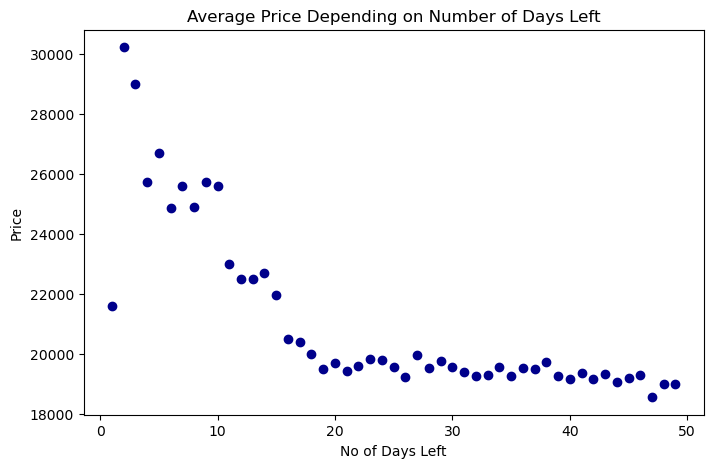

In [239]:

x = df.days_left.unique()
y = df.groupby(df.days_left).price.mean()

#2. Setup the plot
fig, ax = plt.subplots(figsize=(8,5))

#3. Plot the data
ax.scatter(x,y, c='darkblue')

#4. Customize plot
ax.set(title="Average Price Depending on Number of Days Left",
       xlabel="No of Days Left",
       ylabel="Price");

### c) Does ticket price change based on the departure time and arrival time?
>The cheapest average flight ticket prices are the ones whose departure time and arrival time are in the afternoon while those who book flights during late nights tend to pay the highest ticket prices. 

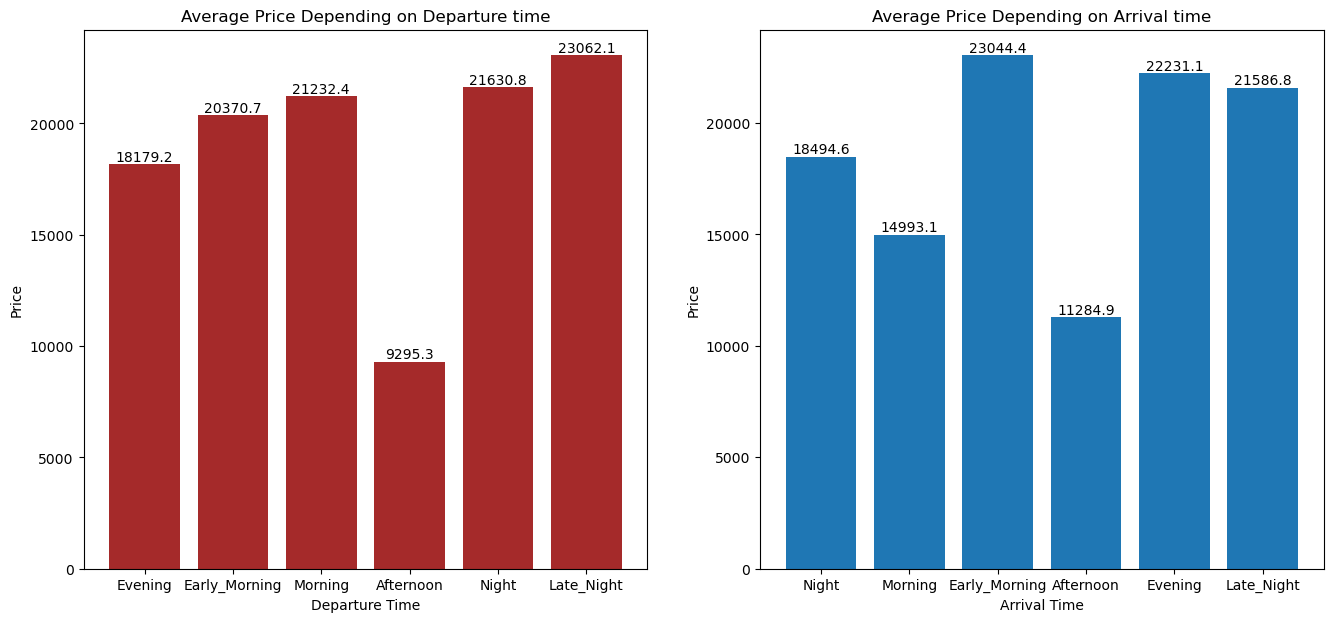

In [254]:
#1. Set the Variables 
x0 = df.departure_time.unique()
y0 = df.groupby(df.departure_time, sort=True).price.mean()

x1 = df.arrival_time.unique()
y1 = df.groupby("arrival_time", sort=True).price.mean()

#2. Setup the plot
fig, (ax0,ax1) = plt.subplots(nrows=1,
                              ncols=2,
                              figsize=(16,7))
colors=['brown']
#3. Plot the data
f0 = ax0.bar(x0,y0, color=colors)
f1 = ax1.bar(x1, y1)
#4. Customize plot
ax0.set(title="Average Price Depending on Departure time",
       xlabel="Departure Time",
       ylabel="Price")
ax0.bar_label(f0)

ax1.set(title="Average Price Depending on Arrival time",
       xlabel="Arrival Time",
       ylabel="Price")
ax1.bar_label(f1);

### d) How does the ticket price vary between number of stops and ticket class?

In [313]:
fd = pd.DataFrame(df.groupby(["stops", "class"]).price.mean()).reset_index()
fd =fd.pivot(index='stops', columns="class", values='price')
fd

class,Business,Economy
stops,,
one,54687.377156,6812.857800
two_or_more,70127.660203,9142.264279
zero,27846.339052,4012.624615


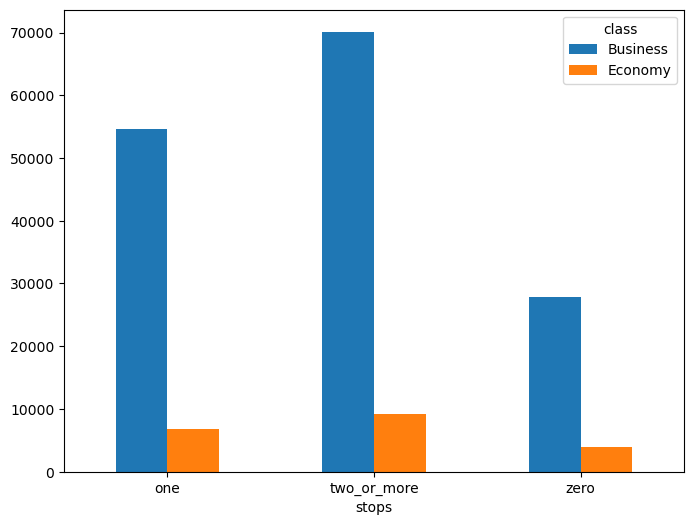

In [349]:
# Plot the grouped bar chart
axe = fd.plot(kind='bar', figsize=(8, 6), rot=0)
ax.set_xlabel('Stops')
ax.set_ylabel('Price')
ax.set_title('Average Price by Stops and Class')
ax.legend(title='Class');

In [282]:
enumerate(fd["class"]);

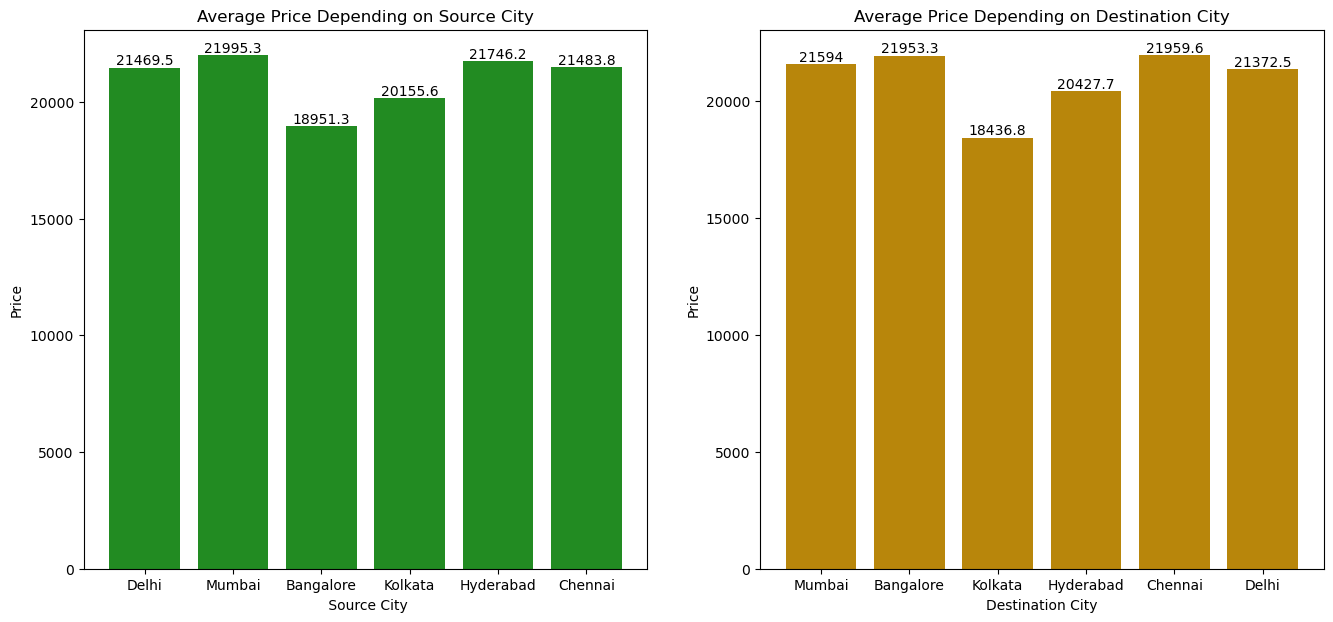

In [252]:
x0 = df.source_city.unique()
y0 = df.groupby(df.source_city, sort=True).price.mean()

x1 = df.destination_city.unique()
y1 = df.groupby("destination_city", sort=True).price.mean()
#2. Setup the plot
fig, (ax0,ax1) = plt.subplots(nrows=1,
                              ncols=2,
                              figsize=(16,7))

#3. Plot the data
f0 = ax0.bar(x0,y0, color=['forestgreen'],)
f1 = ax1.bar(x1, y1, color=['darkgoldenrod'])
#4. Customize plot
ax0.set(title="Average Price Depending on Source City",
       xlabel=" Source City",
       ylabel="Price");
ax0.bar_label(f0)


ax1.set(title="Average Price Depending on Destination City",
       xlabel="Destination City",
       ylabel="Price")
ax1.bar_label(f1);

## 5. Data Preprocessing

In [13]:
# Create a copy of the dataset for data preprocessing
df_copy = df.copy()

In [14]:
df_copy

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


### Turning Non-Numeric Data into Numbers

In [15]:
# Find the columns which contain string values
for label, content in df_copy.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

# Turning all the string value into category values and add +1
for label, content in df_copy.items():
    if pd.api.types.is_object_dtype(content):
        df_copy[label] = pd.Categorical(content).codes + 1

airline
flight
source_city
departure_time
stops
arrival_time
destination_city
class


In [16]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int8   
 1   flight            300153 non-null  int16  
 2   source_city       300153 non-null  int8   
 3   departure_time    300153 non-null  int8   
 4   stops             300153 non-null  int8   
 5   arrival_time      300153 non-null  int8   
 6   destination_city  300153 non-null  int8   
 7   class             300153 non-null  int8   
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int16(1), int64(2), int8(7)
memory usage: 9.4 MB


In [17]:
df_copy.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,5,1409,3,3,3,6,6,2,2.17,1,5953
1,5,1388,3,2,3,5,6,2,2.33,1,5953
2,1,1214,3,2,3,2,6,2,2.17,1,5956
3,6,1560,3,5,3,1,6,2,2.25,1,5955
4,6,1550,3,5,3,5,6,2,2.33,1,5955


In [34]:
corr_matrix = df_copy.corr()
corr_matrix

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
airline,1.000000,0.637918,-0.028350,0.056885,-0.029838,0.037714,-0.030172,-0.178862,-0.001651,-0.010678,0.243358
flight,0.637918,1.000000,-0.009443,0.071564,-0.118833,0.067175,-0.036248,-0.259531,0.205502,-0.000443,0.305872
source_city,-0.028350,-0.009443,1.000000,-0.004688,0.001819,0.044153,-0.222935,0.000075,0.008619,-0.003568,0.004594
departure_time,0.056885,0.071564,-0.004688,1.000000,-0.008518,-0.046282,-0.001761,-0.053340,0.084348,-0.001597,0.058319
stops,-0.029838,-0.118833,0.001819,-0.008518,1.000000,0.010515,-0.012846,0.100262,-0.473860,-0.007047,-0.202620
arrival_time,0.037714,0.067175,0.044153,-0.046282,0.010515,1.000000,-0.037431,-0.027647,0.008679,-0.004191,0.042043
destination_city,-0.030172,-0.036248,-0.222935,-0.001761,-0.012846,-0.037431,1.000000,0.001603,0.001736,-0.005323,0.004795
class,-0.178862,-0.259531,0.000075,-0.053340,0.100262,-0.027647,0.001603,1.000000,-0.138710,0.013039,-0.937860
duration,-0.001651,0.205502,0.008619,0.084348,-0.473860,0.008679,0.001736,-0.138710,1.000000,-0.039157,0.204222
days_left,-0.010678,-0.000443,-0.003568,-0.001597,-0.007047,-0.004191,-0.005323,0.013039,-0.039157,1.000000,-0.091949


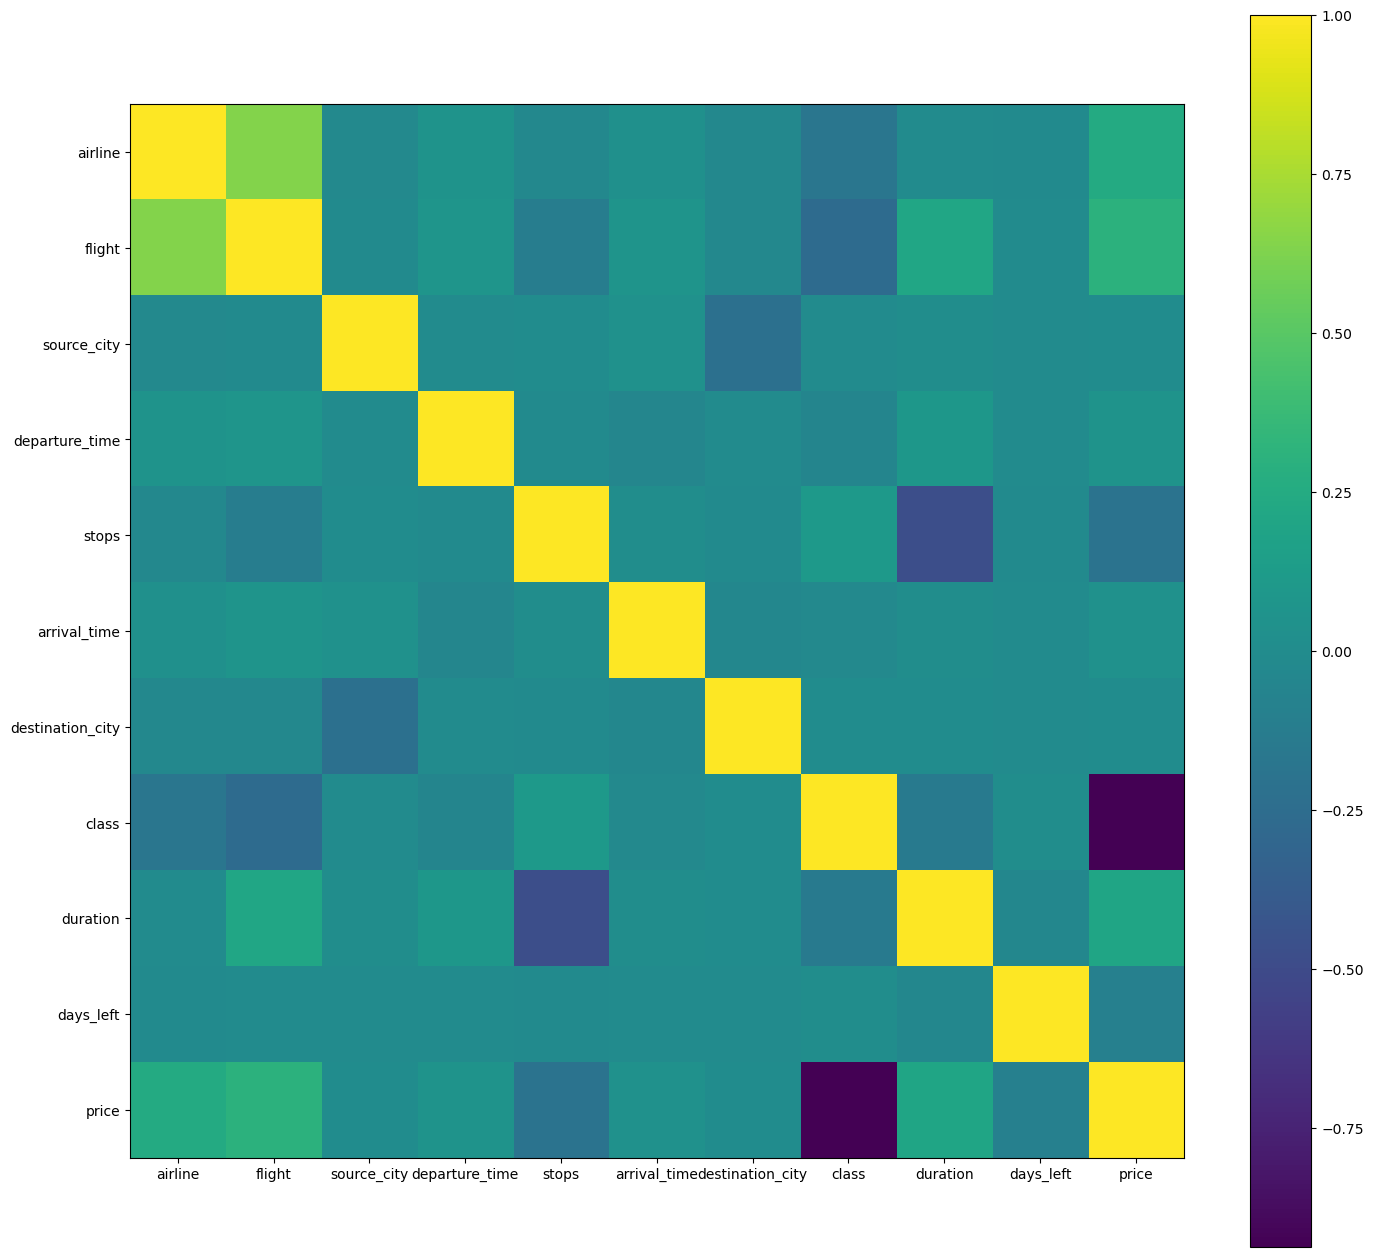

In [255]:
fig, ax = plt.subplots(figsize=(17,16))

im = ax.imshow(corr_matrix)
ax.set_xticks(np.arange(len(corr_matrix.columns)), labels = corr_matrix.columns)
ax.set_yticks(np.arange(len(corr_matrix.index)), labels = corr_matrix.index)
cbar = ax.figure.colorbar(im);

## 6. Data Modelling

In [18]:
# Models from sklearn
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
#Sklearn evaluation metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [19]:
# Split the dataset into X and y
df_copy = df_copy.sample(frac=1)
X = df_copy.drop("price", axis=1)

y = df_copy["price"]

In [20]:
# Split data into training and test dataset
np.random.seed(42)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

### Build an evaluation function

In [21]:
def show_score(model):
    train_preds = model.predict(X_train)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Trainining MSE": mean_squared_error(y_train, train_preds),
              "Training R2": r2_score(y_train, train_preds)}
    return scores

### Testing our model on a subset

In [51]:
%%time
model = make_pipeline(StandardScaler(), 
                      SGDRegressor(random_state=42))

model.fit(X_train, y_train)

CPU times: total: 1.45 s
Wall time: 1.47 s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(random_state=42))])

In [23]:
show_score(model)

{'Training MAE': 4640.6083282390155,
 'Trainining MSE': 49176561.60102059,
 'Training R2': 0.9045295580878687}

### Hyperparameter tuning with RandomizedSearchCV

In [53]:
%%time
# Create a hyperparameter grid for SGDRegression 
sgd_grid = {'penalty': ["l2", "l1", "elasticnet", None],
            'eta0': [0.01, 0.001, 0.0001],
            'alpha': [0.1, 0.01, 0.001, 0.0001],
            'l1_ratio': [1, 0.7, 0.5, 0.2, 0],
            'max_iter': [500, 1000]}

# Instantiate RamdomizedSearchCV model
model = RandomizedSearchCV(SGDRegressor(random_state=42),
                              param_distributions=sgd_grid,
                              n_iter = 6,
                              cv=5,
                              verbose=True)

rs_model= make_pipeline(PolynomialFeatures(),
                        StandardScaler(),
                         model)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\Jedidiah Kristilere\Desktop\ml-course\bulldozer-price-prediction-project\env\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Jedidiah Kristilere\Desktop\ml-course\bulldozer-price-prediction-project\env\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Jedidiah Kristilere\Desktop\ml-course\bulldozer-price-prediction-project\env\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Jedidiah Kristilere\Desktop\ml-course\bulldozer-price-prediction-project\env\lib\site-packages\sklea

CPU times: total: 18min 24s
Wall time: 18min 53s


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('randomizedsearchcv',
                 RandomizedSearchCV(cv=5,
                                    estimator=SGDRegressor(random_state=42),
                                    n_iter=6,
                                    param_distributions={'alpha': [0.1, 0.01,
                                                                   0.001,
                                                                   0.0001],
                                                         'eta0': [0.01, 0.001,
                                                                  0.0001],
                                                         'l1_ratio': [1, 0.7,
                                                                      0.5, 0.2,
                                                                      0],
                                                         'max_iter': [500,
                                                                      1000],
                                                         'penalty': ['l2', 'l1',
                                                                     'elasticnet',
                                                                     None]},
                                    verbose=True))])

In [55]:
show_score(rs_model)

{'Training MAE': 3526.5174201108994,
 'Trainining MSE': 32251343.11859031,
 'Training R2': 0.93738785552409}

### Make predictions with tuned Model

In [32]:
y_preds = rs_model.predict(X_test)

In [33]:
y_preds

array([ 3181.9975138 , 53423.03486073,  6265.84593598, ...,
       59223.7921008 , 29355.10290792,  7485.49831701])

## 7. Feature Importance

Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the target variable (price)

In [57]:
from sklearn.inspection import permutation_importance

In [149]:
feat_imp = permutation_importance(rs_model, X_train, y_train, n_repeats=10)


In [155]:
feat_imp

{'importances_mean': array([2.92832456e-02, 7.06683934e-03, 2.43196112e-03, 3.21866555e-04,
        5.88713614e-02, 1.77372468e-03, 3.50021355e-03, 1.63987401e+00,
        9.26585632e-03, 1.81279783e-02]),
 'importances_std': array([1.65063550e-04, 5.82247376e-05, 2.57710740e-05, 1.58324464e-05,
        3.15208499e-04, 4.89267118e-05, 6.21037448e-05, 3.32120559e-03,
        8.74481102e-05, 5.98108477e-05]),
 'importances': array([[2.94372014e-02, 2.91365806e-02, 2.94681329e-02, 2.95153313e-02,
         2.93337519e-02, 2.93445602e-02, 2.92737059e-02, 2.91642251e-02,
         2.89460774e-02, 2.92128890e-02],
        [7.08154119e-03, 7.02126622e-03, 7.12156626e-03, 6.95895364e-03,
         7.00795657e-03, 7.04638883e-03, 7.16417356e-03, 7.06022186e-03,
         7.08157703e-03, 7.12474826e-03],
        [2.46350427e-03, 2.43097939e-03, 2.42973446e-03, 2.38889309e-03,
         2.48196165e-03, 2.41438539e-03, 2.45021091e-03, 2.41846155e-03,
         2.41050144e-03, 2.43097911e-03],
        [3

In [178]:
feat_df = pd.DataFrame(feat_imp['importances_mean'], index=X.columns, columns=['Feature_Importance'])

In [179]:
feat_df

,Feature_Importance
airline,0.029283
flight,0.007067
source_city,0.002432
departure_time,0.000322
stops,0.058871
arrival_time,0.001774
destination_city,0.003500
class,1.639874
duration,0.009266
days_left,0.018128


In [180]:
(feat_df.sort_values(by=["Feature_Importance"],ascending=True, inplace=True))
feat_df

,Feature_Importance
departure_time,0.000322
arrival_time,0.001774
source_city,0.002432
destination_city,0.003500
flight,0.007067
duration,0.009266
days_left,0.018128
airline,0.029283
stops,0.058871
class,1.639874


Text(0.5, 0, 'feature Importance')

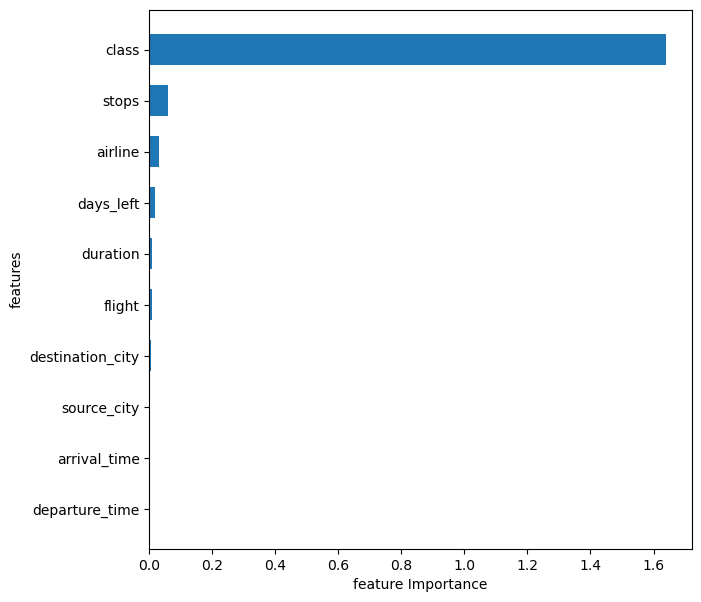

In [181]:
fig, ax = plt.subplots(figsize=(7,7))

ax.barh(feat_df.index, feat_df["Feature_Importance"], height=0.6)
ax.set_ylabel("features")
ax.set_xlabel("feature Importance")